# 💓 Previsão de Doença Cardíaca com Machine Learning

### 📥 Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)


### 📁 Importação dos Dados

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 📊 Verificando Informações Iniciais

In [3]:
print(df.columns)
print(df.isnull().sum())
print(df.info())

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int6

### 🔧 Pré-processamento dos Dados

In [4]:
df_nums = pd.get_dummies(df, drop_first=True)
df_nums.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


## 📊 Análise Exploratória (EDA)

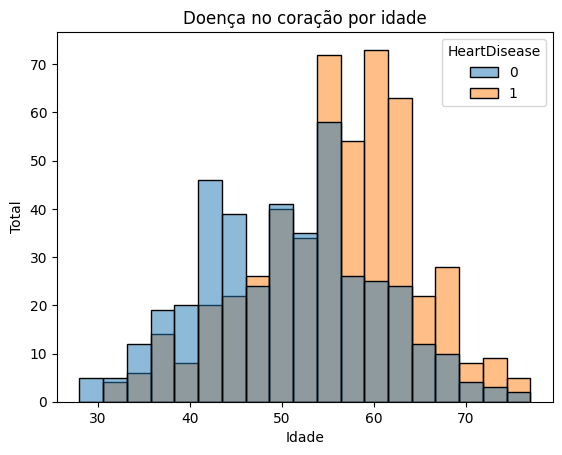

In [5]:
sns.histplot(data=df, x='Age', hue='HeartDisease')
plt.title('Doença no coração por idade')
plt.xlabel('Idade')
plt.ylabel('Total')
plt.show()

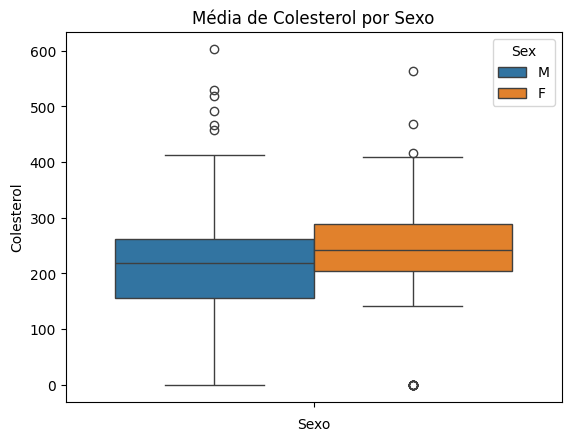

In [6]:
sns.boxplot(data=df, y='Cholesterol', hue='Sex')
plt.title('Média de Colesterol por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Colesterol')
plt.show()

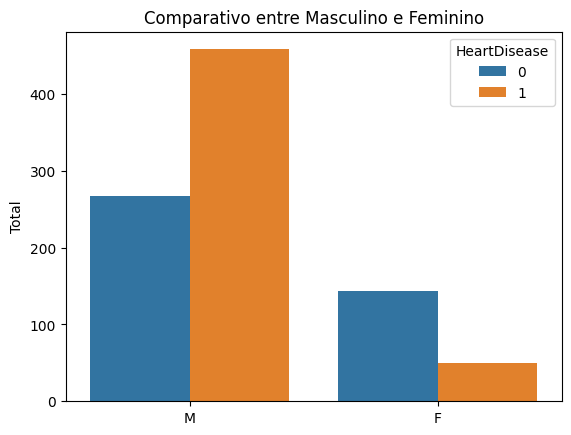

In [7]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Comparativo entre Masculino e Feminino')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

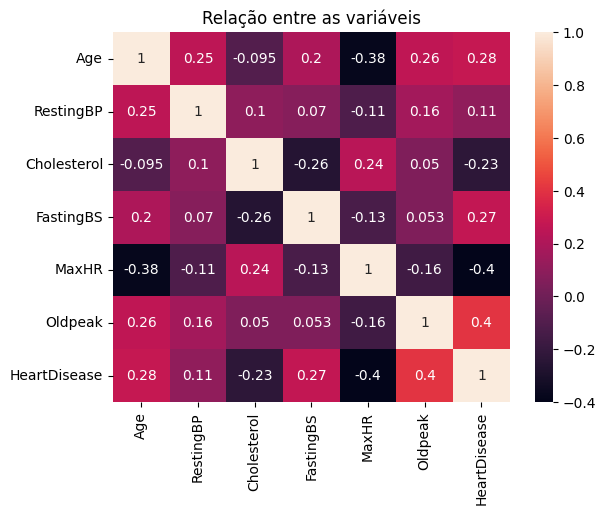

In [8]:
sns.heatmap(data=df.select_dtypes(include='number').corr(), annot=True)
plt.title('Relação entre as variáveis')
plt.show()

## 🤖 Modelagem e Treinamento

In [9]:
X = df_nums[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
             'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
             'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
             'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]
y = df_nums['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9)


### 🔍 Otimizando o modelo KNN

In [10]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_model = GridSearchCV(estimator=knn_pipeline,
                         param_grid={'knn__n_neighbors': range(1,10)},
                         cv=3)
knn_model.fit(X_train,y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 10)})

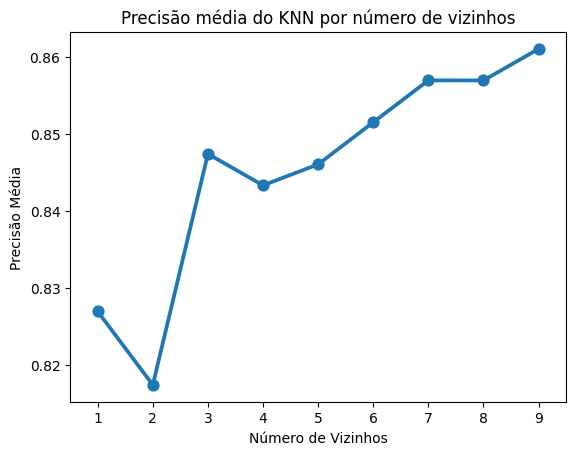

In [11]:
knn_results = pd.DataFrame(knn_model.cv_results_)
sns.pointplot(data=knn_results, x='param_knn__n_neighbors', y='mean_test_score')
plt.title('Precisão média do KNN por número de vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Precisão Média')
plt.show()

### 🌲 Treinando modelo Random Forest

In [16]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
knn_pred = knn_model.best_estimator_.predict(X_test)


## 📈 Avaliação dos Modelos

In [17]:
print(f'Precisão do KNN: {accuracy_score(y_test, knn_pred) * 100:.2f}%')
print(f'Precisão do Random Forest: {accuracy_score(y_test, rf_pred) * 100:.2f}%')

print('\nRelatório de Classificação - KNN:')
print(classification_report(y_test, knn_pred))
print('\nRelatório de Classificação - Random Forest:')
print(classification_report(y_test, rf_pred))


Precisão do KNN: 88.04%
Precisão do Random Forest: 86.96%

Relatório de Classificação - KNN:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        90
           1       0.85      0.93      0.89        94

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        90
           1       0.83      0.94      0.88        94

    accuracy                           0.87       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184



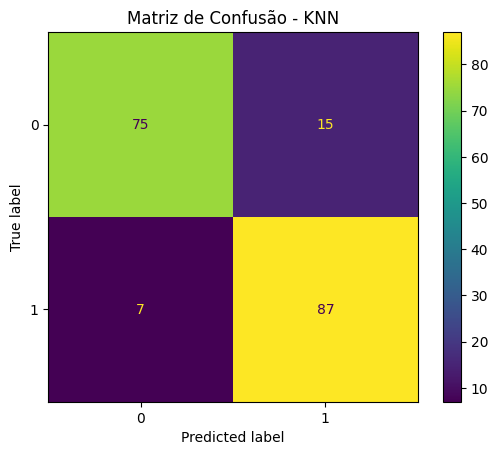

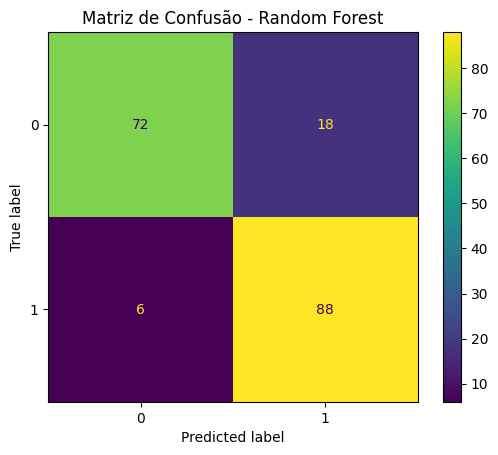

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
plt.title('Matriz de Confusão - KNN')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title('Matriz de Confusão - Random Forest')
plt.show()

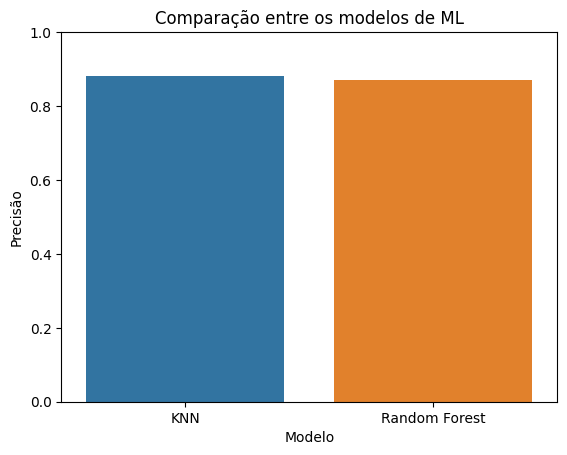

In [20]:
model_names = ['KNN', 'Random Forest']
accuracies = [
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, rf_pred)
]

sns.barplot(x=model_names, y=accuracies, hue=model_names)
plt.title('Comparação entre os modelos de ML')
plt.xlabel('Modelo')
plt.ylabel('Precisão')
plt.ylim(0, 1)
plt.show()